In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




def sorted_values(eigen_values, eigen_vectors):
    eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
#     print(eig_pairs)
    eig_pairs.sort(reverse = True, key=lambda k: k[0])
    return [x[0] for x in eig_pairs], [y[1] for y in eig_pairs]

def pca(input_array,components,pcaIndex1,pcaIndex2):
    number_of_features = input_array.shape[1]
    scaler = StandardScaler()
    scaled_input = scaler.fit_transform(input_array)
    covariance_mat = np.cov(scaled_input.T) # Mean centeres the data and finds the covarience
    eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
    eigen_values, eigen_vectors = sorted_values(eigen_values, eigen_vectors)
    stacked_eigen_mat = np.hstack((eigen_vectors[pcaIndex1].reshape(number_of_features,1),eigen_vectors[pcaIndex2].reshape(number_of_features,1)))
        
    return scaled_input.dot(stacked_eigen_mat)
    

In [2]:
def within_class_scatter_matrix(data , mean_vectors, number_of_features, number_of_classes):
    S_W = np.zeros((number_of_features,number_of_features))
    for class_val,mean_vec in enumerate(mean_vectors): 
        scatter_matrix = np.zeros((number_of_features,number_of_features))   
        
        # scatter matrix for every class
        for data_instance in data[class_val]:
            data_instance, mean_vec = data_instance.reshape(number_of_features,1), mean_vec.reshape(number_of_features,1) # make column vectors
            scatter_matrix += (data_instance-mean_vec).dot((data_instance-mean_vec).T)
        S_W += scatter_matrix   
    return S_W

def between_class_scatter_matrix(data , mean_vectors, number_of_features, number_of_classes):
    S_B = np.zeros((number_of_features,number_of_features))
    for class_val,mean_vec in enumerate(mean_vectors):  
        n = data[class_val].shape[0]
        mean_vec = mean_vec.reshape(number_of_features,1)
        overall_mean = np.mean(mean_vectors, axis=0).reshape(number_of_features,1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        
    return S_B


def lda(data, components):
    print(data.shape)
    number_of_classes = data.shape[0]
    number_of_features = data.shape[2]
    mean_vectors = np.mean(data, axis=1)
    
    S_W = within_class_scatter_matrix(data ,mean_vectors ,number_of_features, number_of_classes)
    S_B = between_class_scatter_matrix(data ,mean_vectors ,number_of_features, number_of_classes)
#     print(S_W,S_B,sep="\n")
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#     print(eigen_values,eigen_vectors,sep="\n")
    eigen_values, eigen_vectors = sorted_values(eigen_values, eigen_vectors)

    print(np.array(eigen_values).shape)
    
#     print(eigen_vectors)
    stacked_eigen_mat = eigen_vectors[0]
    for _ in range(1,components):
        stacked_eigen_mat = np.hstack((stacked_eigen_mat.reshape(number_of_features, 1),eigen_vectors[_].reshape(number_of_features, 1)))
        
#     print(stacked_eigen_mat)
    return data.dot(stacked_eigen_mat)
    

In [3]:
iris_dataset = np.genfromtxt("data/iris.csv",delimiter=",")
iris_dataset = iris_dataset[:,:4]
iris_dataset = iris_dataset.reshape(3,50,4)
lda(iris_dataset, 2)

(3, 50, 4)
(4,)


array([[[ 1.49220928, -1.9047102 ],
        [ 1.25765567, -1.60841445],
        [ 1.3487506 , -1.74984635],
        [ 1.18024885, -1.63919095],
        [ 1.51043263, -1.96271183],
        [ 1.40183784, -2.22012481],
        [ 1.27966155, -1.91802239],
        [ 1.37835575, -1.81948346],
        [ 1.11648646, -1.54502342],
        [ 1.3131003 , -1.56518244],
        [ 1.57646265, -1.99977597],
        [ 1.28272558, -1.79225834],
        [ 1.30854321, -1.530813  ],
        [ 1.37003298, -1.60260779],
        [ 1.9385142 , -2.25635444],
        [ 1.76617886, -2.5681761 ],
        [ 1.62043071, -2.32183942],
        [ 1.42083076, -1.98141342],
        [ 1.49597495, -2.08721643],
        [ 1.48232553, -2.13268434],
        [ 1.35102322, -1.77221909],
        [ 1.37223268, -2.1504877 ],
        [ 1.6470616 , -2.06083351],
        [ 1.03670041, -1.94073418],
        [ 1.11878093, -1.71597237],
        [ 1.16885021, -1.55845538],
        [ 1.1809505 , -1.94746124],
        [ 1.45805203, -1.880

In [4]:
def plot_PCA(projected_data,title):
    projected_data = projected_data.reshape(3,50,2)
    plt.title(title)
    plt.scatter(x=projected_data[0,:,0], y=projected_data[0,:,1],c="b",label="Class 1")
    plt.scatter(x=projected_data[1,:,0], y=projected_data[1,:,1],c="r",label="Class 2")    
    plt.scatter(x=projected_data[2,:,0], y=projected_data[2,:,1],c="g",label="Class 3")    
    plt.legend()
    plt.show()

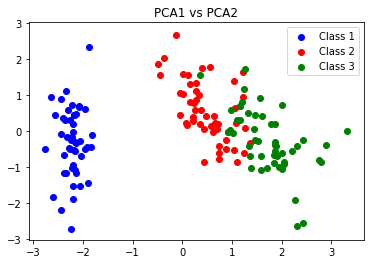

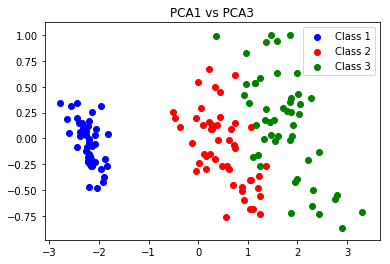

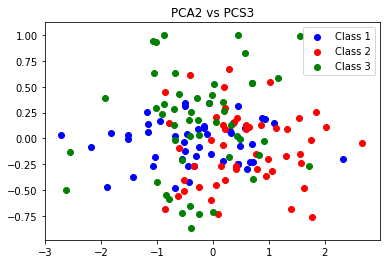

In [5]:
plot_PCA(pca(iris_dataset.reshape(150,4), 2,0,1),"PCA1 vs PCA2")
plot_PCA(pca(iris_dataset.reshape(150,4), 2,0,2), "PCA1 vs PCA3")
plot_PCA(pca(iris_dataset.reshape(150,4), 2,1,2), "PCA2 vs PCS3")

(2, 50, 4)
(4,)


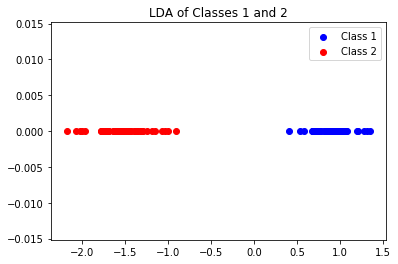

(2, 50, 4)
(4,)


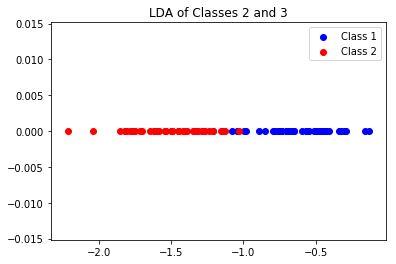

(2, 50, 4)
(4,)


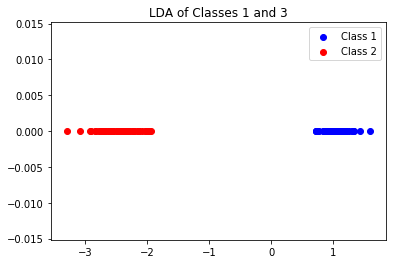

In [6]:
def plot_LDA(projected_data,title):
    plt.title(title)
    y_axis = np.zeros((50,1))
    plt.scatter(x=projected_data[0], y= y_axis, c ="b",label="Class 1")
    plt.scatter(x=projected_data[1], y= y_axis, c="r",label="Class 2")    
#     plt.scatter(x=projected_data[2], y= y_axis, c="g",label="Class 3")    
    plt.legend()
    plt.show()

plot_LDA(lda(iris_dataset[:2, :,:], 1),"LDA of Classes 1 and 2")
plot_LDA(lda(iris_dataset[1:,:,:], 1),"LDA of Classes 2 and 3")
plot_LDA(lda(np.vstack((iris_dataset[0, :,:],iris_dataset[2, :,:])).reshape(2,50,4),1),"LDA of Classes 1 and 3")





## Arcene Cancer Dataset

In [7]:
def scree_plot(input_array):
    number_of_features = input_array.shape[1]
#     scaler = StandardScaler()
#     scaled_input = scaler.fit_transform(input_array)
    covariance_mat = np.cov(input_array.T) # Mean centeres the data and finds the covarience
#     eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
    
#     eigen_values[::-1].sort()
    
    eigen_values, eigen_vectors = sorted_values(eigen_values, eigen_vectors.real)
#     print(eigen_values)
    plt.plot(np.arange(len(eigen_values)) + 1, eigen_values, 'ro-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigen Values')
    plt.show()
    return eigen_values, eigen_vectors

(44, 10000)


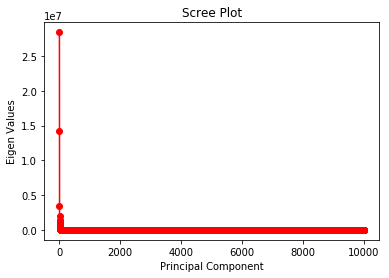

In [10]:
numberOfFeaures=10000
file = open('data/arcene_train.data')
trainData = np.array([list(map(int, file.readline().strip().split(' '))) for _ in range(100)])
# print(trainData.shape)
file = open('data/arcene_train.labels')
trainLables = np.array([int(file.readline().strip()) for _ in range(100)])
# print(trainLables.shape)

class1 = trainData[trainLables == 1]
class2 = trainData[trainLables == -1]
print(class1.shape)
cancer_dataset = np.vstack((class1,class2))
# print(cancer_dataset.shape)

eigen_values, eigen_vectors = scree_plot(trainData)


In [11]:

def print_variance_coverage(eigen_values, eigen_vectors):
    print('Variance Coverage:\n')
    eigv_sum = sum(eigen_values)
#     print(eigen_values)
    var = np.cumsum(eigen_values)/eigv_sum *100
    print(np.where(var >= 85))
    print(np.where(var >= 100))
#             print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
        
print_variance_coverage(eigen_values, eigen_vectors)

Variance Coverage:

(array([   9,   10,   11, ..., 9997, 9998, 9999]),)
(array([  98,   99,  100, ..., 9997, 9998, 9999]),)
